In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_2min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_2min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [4]:

base_folder = "csv/30s1.00s/"

dataset = pd.DataFrame()

for path, subdirs, files in os.walk(base_folder):
    for name in files:
        data = pd.read_csv(os.path.join(str(path), str(name)))
        if(split_number(name)[0] == 'cap'):
            continue
        data['label'] = split_number(name)[0]
        dataset = pd.concat([dataset, data])
dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_2min_y', 'down_packet_3min_y', 'down_packet_4min_y',
       'down_packet_5min_y', 'down_packet_1min_x', 'down_packet_2min_x',
       'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x',
       'label'],
      dtype='object', length=133)
133


In [5]:
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh.csv', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn.csv', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn.csv', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn.csv', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn.csv', 'label'] = 'acestream'
dataset['label'].value_counts()

netflix      569
youtube      461
acestream    248
twitch       225
Name: label, dtype: int64

In [6]:
#Test some stuff
#dataset.drop(columns=silences, inplace=True)
dataset.columns
features = dataset.columns[:-1]
features

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_3min_y',
       'down_packet_4min_y', 'down_packet_5min_y', 'down_packet_1min_x',
       'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x',
       'down_packet_5min_x'],
      dtype='object', length=132)

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1473    2
1474    2
1475    2
1476    2
1477    2
1478    2
1479    2
1480    2
1481    2
1482    2
1483    2
1484    2
1485    2
1486    2
1487    2
1488    2
1489    2
1490    2
1491    2
1492    2
1493    2
1494    2
1495    2
1496    2
1497    2
1498    2
1499    2
1500    2
1501    2
1502    2
Name: label, Length: 1503, dtype: int64

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
up_bytes_silence_mean          0.642040
down_bytes_silence_mean        0.641925
up_bytes_shortest_silence      0.533203
up_packet_shortest_silence     0.533203
down_bytes_shortest_silence    0.533203
down_bytes_perc25              0.500448
up_packet_longest_silence      0.460539
up_bytes_longest_silence       0.460539
down_packet_perc25             0.460033
down_bytes_longest_silence     0.455390
up_bytes_perc25                0.404766
up_packet_perc25               0.391466
up_packet_silences             0.331956
up_bytes_silences              0.331956
down_bytes_silences            0.318348
down_packet_silences           0.318348
down_packet_median             0.198868
down_packet_perc50             0.198868
up_packet_perc50               0.183013
up_packet_median               0.183013
down_bytes_perc50              0.178715
down_bytes_median              0.178715
up_bytes_median                0.132959
up_bytes_perc50                0.132959


In [9]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [10]:
'''
from sklearn.preprocessing import normalize
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())
dataset_normalized = normalize(dataset_no_label)
dataset = pd.DataFrame(dataset_normalized, columns=features)
'''

"\nfrom sklearn.preprocessing import normalize\n# Normalize data\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\n#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())\ndataset_normalized = normalize(dataset_no_label)\ndataset = pd.DataFrame(dataset_normalized, columns=features)\n"

In [11]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=10)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [14]:
x_train

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
799,0.879593,0.190769,1.404774,1.973389,1.062928,-0.276773,-0.282755,0.190769,1.441475,3.121046,...,0.005541,0.005882,0.002673,-1.000000,-1.0,11.687342,9.462278,3.978398,-1.000000,-1.0
1349,0.790971,-0.075750,2.769057,7.667675,2.860182,7.127311,-0.448144,-0.075750,0.425096,1.346347,...,0.010373,0.012255,0.001311,-1.000000,-1.0,12.204785,8.724062,2.579672,-1.000000,-1.0
1428,0.241942,0.291678,0.800059,0.640094,-0.021780,-1.426360,-0.435217,0.291678,1.019688,1.284463,...,0.002020,0.002768,0.003387,-1.000000,-1.0,12.337687,4.731139,3.186284,-1.000000,-1.0
1150,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1100,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
342,-0.066960,-0.157837,0.529482,0.280352,4.583063,20.911806,-0.299731,-0.157837,-0.061937,0.131357,...,0.001820,0.001571,0.001115,-1.000000,-1.0,11.375141,9.061108,6.547470,-1.000000,-1.0
1490,-0.235245,-0.480009,0.823406,0.677998,0.552440,-1.128294,-0.900050,-0.480009,0.496123,1.036155,...,0.000560,0.001814,0.006084,0.006997,-1.0,13.094940,8.399553,5.387767,3.381850,-1.0
1031,0.044229,-0.306907,0.643122,0.413606,1.950240,2.379129,-0.306907,-0.306907,0.005425,1.164278,...,0.001106,0.003724,0.007195,-1.000000,-1.0,12.008113,5.358670,2.752872,-1.000000,-1.0
1047,-0.122577,-0.306907,0.505231,0.255258,4.340949,19.002646,-0.306907,-0.306907,-0.093823,0.056036,...,0.000692,0.003916,-1.000000,-1.000000,-1.0,10.601893,6.069436,-1.000000,-1.000000,-1.0
552,-0.234460,-0.392946,0.528559,0.279375,4.351489,18.449993,-0.392946,-0.392946,-0.338340,-0.163649,...,0.003720,0.009495,0.006065,0.008537,-1.0,12.814342,9.411176,5.159343,3.067764,-1.0


In [15]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
y_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")
y_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")
y_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")
y_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_predict, cross_val_score\nimport matplotlib.pyplot as plt\n\nrandom_forest = RandomForestClassifier(random_state=42)\ny_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")\ny_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")\ny_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")\ny_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")\n'

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [17]:
'''
y_scores_forest_y = y_probas_forest_y[:, 1]
y_scores_forest_n = y_probas_forest_n[:, 1]
y_scores_forest_t = y_probas_forest_t[:, 1]

fpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)
fpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)
fpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


plot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")
plot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")
plot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")
#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

plt.legend(loc="lower right")
plt.show()
#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
#accuracy = sum(cvs)/len(cvs)
#print("Accuracy: " + str(accuracy))
'''

'\ny_scores_forest_y = y_probas_forest_y[:, 1]\ny_scores_forest_n = y_probas_forest_n[:, 1]\ny_scores_forest_t = y_probas_forest_t[:, 1]\n\nfpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)\nfpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)\nfpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)\n#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)\n\n\nplot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")\nplot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")\nplot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")\n#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")\n\nplt.legend(loc="lower right")\nplt.show()\n#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring=\'accuracy\')\n#accuracy = sum(cvs)/len(cvs)\n#print("Accuracy: " + str(accuracy))\n'

In [18]:
'''
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
conf_mx
'''

'\nrandom_forest.fit(x_train, y_train)\npredictions = random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nconf_mx\n'

In [19]:
#grid_search_acc = GridSearchCV(random_forest, params, cv=10, scoring='accuracy')
#grid_search_acc.fit(x_train, y_train)

In [20]:
#best = grid_search.best_estimator_

In [21]:
#best2 = grid_search_acc.best_estimator_

In [22]:
#sorted(zip(grid_search.best_estimator_.feature_importances_, basic_stats), reverse=True)

In [23]:
'''
# Final evaluation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(x_train, y_train)
print("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))
'''

'\n# Final evaluation\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9, max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)\nrf.fit(x_train, y_train)\nprint("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))\n'

In [24]:
'''
crossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")
crossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))
'''

'\ncrossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")\ncrossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")\nprint("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))\n'

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    '''
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [26]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    '''
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [27]:
def do_test_knn(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
[[ 40   0   2   0]
 [  0  81   2   0]
 [  3   2 114   1]
 [  0   0   0  56]]

Accuracy train set: 1.0
Accuracy test set: 0.9667774086378738


'\nprint("-----OvO Classifier Random Forest------")\n\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9,\n                            max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0,\n                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,\n                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,\n                            random_state=42, verbose=0, warm_start=False)\nrf = OneVsOneClassifier(rf)\ndo_test_forest(rf)\n\nprint("----------SVM-----------")\nsvm = SVC(random_state=42, probability=True)\ndo_test_svm(svm)\n\nprint("----------Knn-----------")\nknn = KNeighborsClassifier()\ndo_test_knn(knn)\n\nprint("-----Neural Network-----")\nnn = MLPClassifier()\ndo_test_knn(nn)\n\n\nprint("--------AdaBoost Random Forest--------")\n\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9,\n      

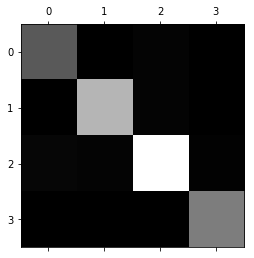

In [28]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

do_test_forest(rf)

'''
print("-----OvO Classifier Random Forest------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)
rf = OneVsOneClassifier(rf)
do_test_forest(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)


'''



In [ ]:
'''
from sklearn.model_selection import GridSearchCV
params = dict()

random_forest = RandomForestClassifier()

params['forest'] = {
    'max_depth' : [6,7,8,9],
    'n_estimators': [30,100,300],
    'criterion': ['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 10],
}

grid_search = GridSearchCV(random_forest, params['forest'], cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_random_forest = grid_search.best_estimator_

predictions = best_random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
print("\nAccuracy train set: " + str(sum(best_random_forest.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))
'''

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

do_test_forest(rf)


-----Random Forest------


KeyboardInterrupt: 

In [30]:
# Save model

from sklearn.externals import joblib
joblib.dump(rf, '../models/rf_model_01s.sav') 


['../models/rf_model_01s.sav']

In [68]:
for path, subdirs, files in os.walk(base_folder):
    for name in files:
        if name == 'cap3.csv':
            test = pd.read_csv(os.path.join(str(path), str(name)))
test = test.drop(columns=['Unnamed: 0']).reset_index()
test.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence','label'], inplace=True)
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(test)
test = pd.DataFrame(imputer.transform(test), columns=test.columns)
print(rf.predict_log_proba(test))
print(rf.predict(test))

[[-0.65946734 -1.73477919 -1.2318347  -4.22145108]
 [-0.34487931 -4.11526472 -1.37651383 -3.77594527]
 [-0.16042623 -3.82198385 -2.0832087  -6.31718965]
 [-0.49440497 -2.76821807 -1.18112638 -3.8941985 ]
 [-0.13421028 -4.403363   -2.19051664 -6.50311376]
 [-0.30400206 -3.16321299 -1.53384557 -5.48550383]
 [-0.17031451 -4.36427963 -1.9777458  -5.20376361]
 [-0.1332101  -4.05725409 -2.246051   -6.43394457]
 [-0.10791961 -3.83569323 -2.52406313 -7.45159518]
 [-0.25609308 -3.09667795 -1.73380679 -5.49186039]
 [-0.06928215 -4.4673744  -2.91726127 -6.58740486]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
from sklearn.externals import joblib
rf = joblib.load('../models/rf_model_01s.sav')

In [47]:
print(prevlabel[4000])
dataset['label'][4000]


acestream


3

In [53]:
test

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
0,-0.049954,-0.403884,0.903263,0.815885,0.936888,-0.152483,-0.777905,-0.403884,0.496817,1.335181,...,0.002346,0.001808,0.001815,-1.000000,-1.0,11.071279,3.978398,2.497202,-1.000000,-1.0
1,-0.555438,-1.038336,0.953788,0.909712,2.042770,3.353170,-1.076309,-1.038336,-0.688625,0.728165,...,0.015163,0.000547,-1.000000,-1.000000,-1.0,11.814609,6.727171,-1.000000,-1.000000,-1.0
2,-0.429697,-0.797330,1.049213,1.100848,1.963251,2.620611,-1.040970,-0.797330,-0.604283,1.413431,...,0.000837,0.002284,-1.000000,-1.000000,-1.0,10.262960,3.220981,-1.000000,-1.000000,-1.0
3,-0.290295,-0.852862,1.105632,1.222422,1.520949,1.379564,-1.076309,-0.852862,0.033406,1.490957,...,0.013611,0.002952,0.002953,-1.000000,-1.0,12.676306,7.336032,4.808627,-1.000000,-1.0
4,0.490188,0.728495,1.230044,1.513008,0.312373,-0.971798,-0.726433,0.728495,1.389561,1.860390,...,0.001233,0.004270,0.003137,-1.000000,-1.0,9.669475,4.087589,2.650473,-1.000000,-1.0
5,0.412808,0.602065,0.860344,0.740192,-0.417224,-1.152910,-0.262419,0.602065,1.011425,1.422233,...,0.008492,0.002504,0.000737,-1.000000,-1.0,13.237534,6.036658,2.524395,-1.000000,-1.0
6,0.350947,0.470368,0.871598,0.759682,0.216610,-0.865017,-0.559836,0.470368,0.849711,1.411894,...,0.003404,0.006488,0.001413,0.003516,-1.0,13.674702,7.140066,3.768688,2.538102,-1.0
7,-0.268645,-0.620746,1.062333,1.128552,1.905095,3.268406,-1.053646,-0.620746,-0.213910,1.118297,...,0.002405,0.002918,-1.000000,-1.000000,-1.0,7.660826,3.291511,-1.000000,-1.000000,-1.0
8,-0.061178,-0.247054,0.810107,0.656273,0.315406,-1.275492,-0.870641,-0.247054,0.627636,1.170910,...,0.006532,0.004598,0.000632,-1.000000,-1.0,9.988808,5.358670,2.497202,-1.000000,-1.0
9,0.236846,0.320672,0.891537,0.794837,-0.037296,-1.229062,-0.767698,0.320672,0.949033,1.227913,...,0.016661,0.001908,0.000587,-1.000000,-1.0,12.337687,6.949335,3.118009,-1.000000,-1.0
